<a href="https://colab.research.google.com/github/DivyaDariniSivabalan/COGNORISE/blob/main/Unemploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
u = files.upload()

Saving Unemployment in India.csv to Unemployment in India (1).csv


In [ ]:
df = pd.read_csv("Unemployment in India.csv")

In [ ]:
df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(740, 7)

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [ ]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
df['Region'].nunique()

28

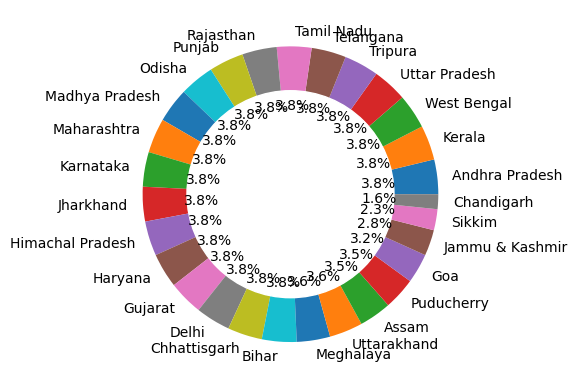

In [ ]:
a = df['Region'].value_counts()
plt.pie(a.values, labels=a.index, autopct='%1.1f%%')
c = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(c)
plt.show()

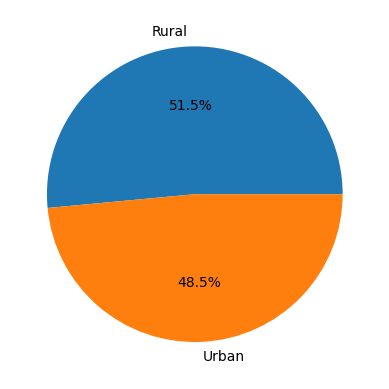

In [ ]:
plt.pie(df['Area'].value_counts(),labels=['Rural','Urban'], autopct='%1.1f%%')
plt.show()

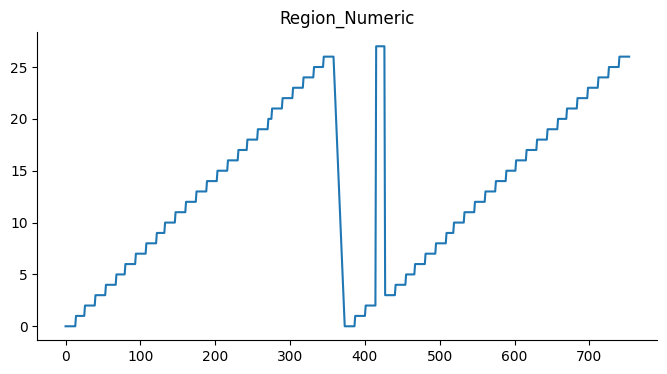

In [ ]:
df['Region_Numeric'].plot(kind='line', figsize=(8, 4), title='Region_Numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

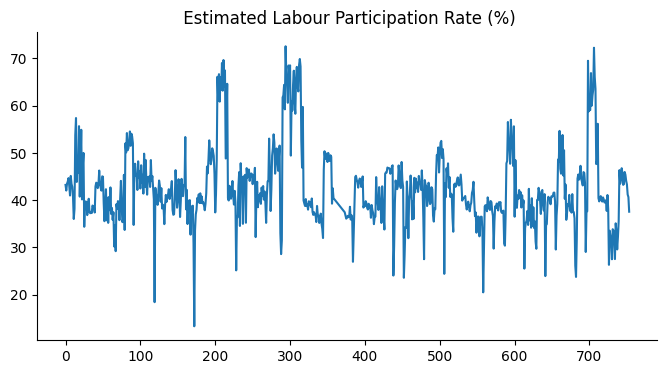

In [ ]:
df[' Estimated Labour Participation Rate (%)'].plot(kind='line', figsize=(8, 4), title=' Estimated Labour Participation Rate (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

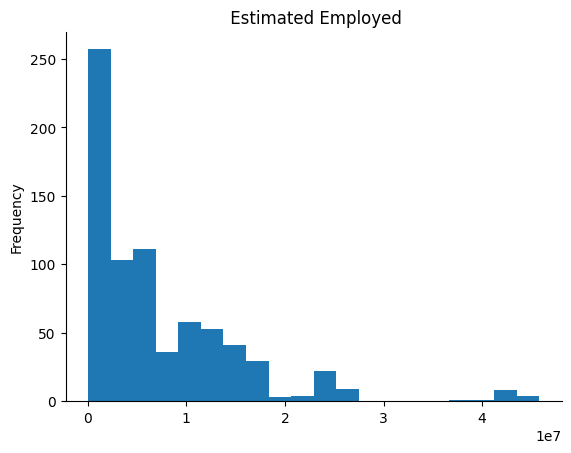

In [ ]:
df[' Estimated Employed'].plot(kind='hist', bins=20, title=' Estimated Employed')
plt.gca().spines[['top', 'right',]].set_visible(False)

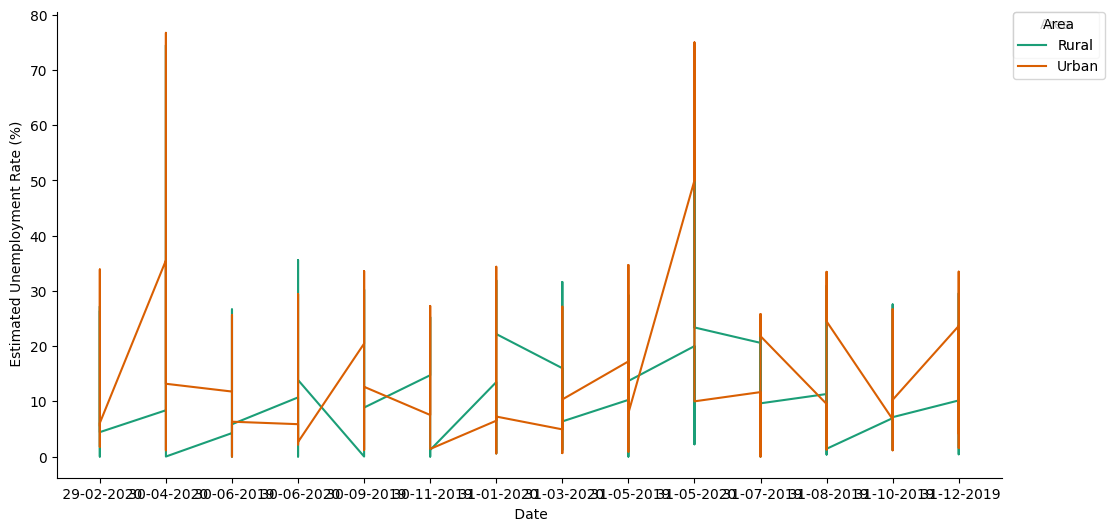

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Date']
  ys = series[' Estimated Unemployment Rate (%)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values(' Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Date')
_ = plt.ylabel(' Estimated Unemployment Rate (%)')

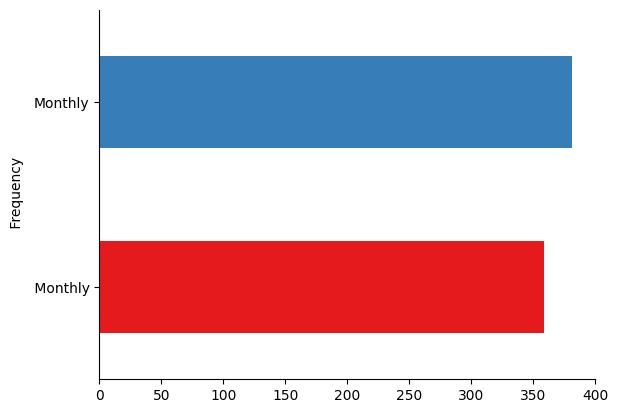

In [ ]:
df.groupby(' Frequency').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X = df[' Estimated Unemployment Rate (%)']
Y = df[' Estimated Employed']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
x_train = x_train.reshape(-1,1) # Reshape x_train to a 2D array
x_test = x_test.reshape(-1,1) # Reshape x_test to a 2D array
LR = LinearRegression()
LR.fit(x_train,y_train)
c=LR.predict(x_test)
print(r2_score(y_test,c)*100)

3.232845816663632
